# Predicting Customer Churn with Machine Learning



In this Jupyter Notebook, we embark on a journey to predict customer churn, a vital task in understanding and retaining customer relationships. We will leverage machine learning to develop accurate predictive models. Our analysis is divided into three critical sections within the Model Building phase:

- **Logistic Regression (7.1)**
- **Random Forest Classifier (7.2)**
- **Gradient Boosting Classifier (7.3)**

## The Significance of Customer Churn Prediction

Customer churn, the phenomenon of customers ceasing their relationship with a business, can have profound implications for companies across industries. It can lead to lost revenue, increased marketing costs, and damage to a company's reputation. 

Using machine learning to predict customer churn is instrumental because it allows businesses to:
- **Proactively Address Issues**: Identify at-risk customers and take preventive measures to retain them.
- **Optimize Marketing Efforts**: Target marketing campaigns more effectively by focusing on customers likely to churn.
- **Enhance Customer Satisfaction**: Improve service and product quality based on insights gained from churn analysis.
- **Boost Profitability**: Retaining existing customers is often more cost-effective than acquiring new ones.

In this notebook, we will explore, clean, and preprocess the data, encode categorical variables, and perform exploratory data analysis (EDA) to understand patterns. Subsequently, we will split the data into training and testing sets. Then, we will build three distinct machine learning models—Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier—to predict customer churn with the aim of helping businesses mitigate this critical issue.

Let's begin our journey toward reducing churn and enhancing customer relationships through data-driven insights and machine learning.

## Table of Contents

1. [Importing Libraries](#importing-libraries)
2. [Exploring Data](#exploring-data)
3. [Cleaning Data](#cleaning-data)
4. [Encoding Categorical Data](#encoding-categorical-data)
5. [Exploring Correlations](#exploring-correlations)
6. [Splitting Data](#splitting-data)
7. [Model Building](#model-building)


Let's dive into the code!


# Importing Libraries

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [30]:
data = pd.read_csv('Churn_Modelling.csv')

# Exploring Data

In [31]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


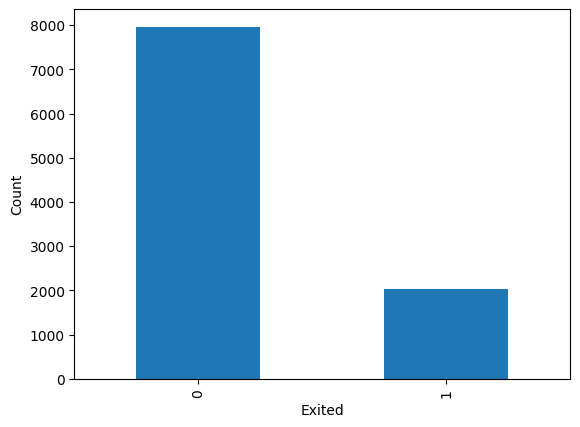

In [32]:
data['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

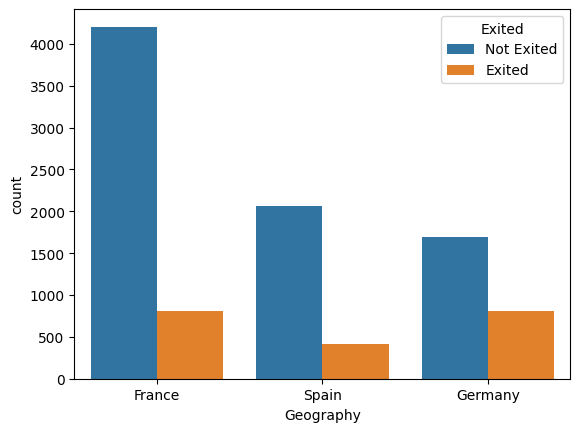

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Exited' column contains 0 and 1, you can rename the categories like this:
data['Exited'] = data['Exited'].astype('category')
data['Exited'] = data['Exited'].cat.rename_categories(['Not Exited', 'Exited'])

# Now you can create the countplot with the 'Exited' column as hue
sns.countplot(x='Geography', hue='Exited', data=data)
plt.show()


C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\medoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

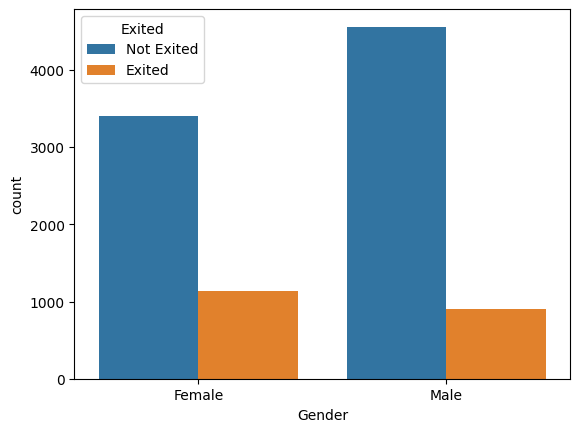

In [34]:
sns.countplot(x='Gender',hue='Exited',data=data)
plt.show()

# Cleaning Data

In [35]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [36]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [37]:
data.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Not Exited
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Not Exited
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Not Exited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,Not Exited
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,Not Exited
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,Exited


In [38]:
cols_to_drop=['RowNumber','CustomerId','Surname']
data.drop(cols_to_drop,axis=1,inplace=True)

In [39]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Not Exited
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Exited
3,699,France,Female,39,1,0.00,2,0,0,93826.63,Not Exited
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Not Exited


# Encoding Categorical Data

In [40]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [41]:
data.Gender = pd.Categorical(data.Gender).codes

In [42]:
data.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [43]:
data.Geography = pd.Categorical(data.Geography).codes

# Exploring Correlations

In [44]:
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()

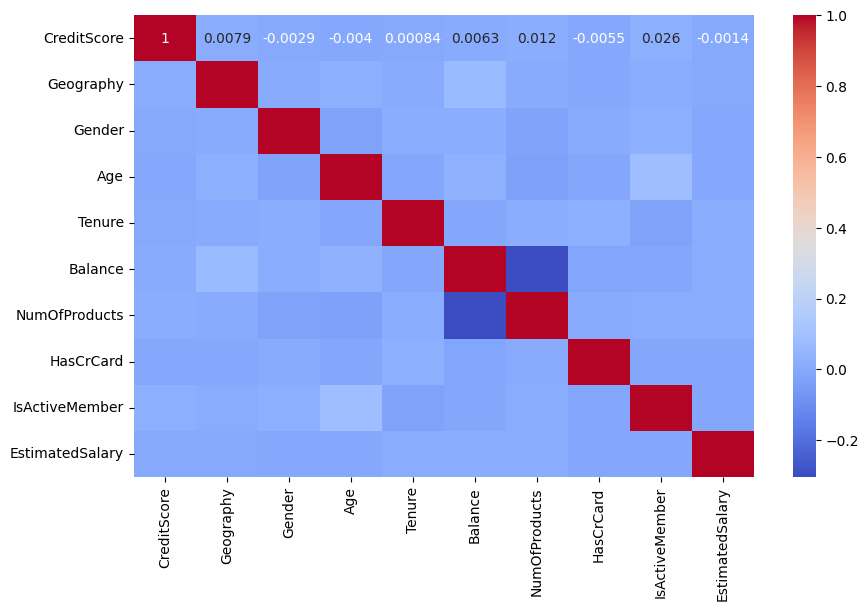

In [56]:
numeric_columns = data.select_dtypes(include=['number'])
corr = numeric_columns.corr()
color_palette = 'coolwarm'

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap=color_palette)
plt.show()

In [46]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,Exited
1,608,2,0,41,1,83807.86,1,0,1,112542.58,Not Exited
2,502,0,0,42,8,159660.80,3,1,0,113931.57,Exited
3,699,0,0,39,1,0.00,2,0,0,93826.63,Not Exited
4,850,2,0,43,2,125510.82,1,1,1,79084.10,Not Exited


# Splitting Data

In [47]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=40)

# Model Building

****1. Logistic Regression****

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


****2. Random Forest Classifier****

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


****3. Gradient Boosting Classifier****

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


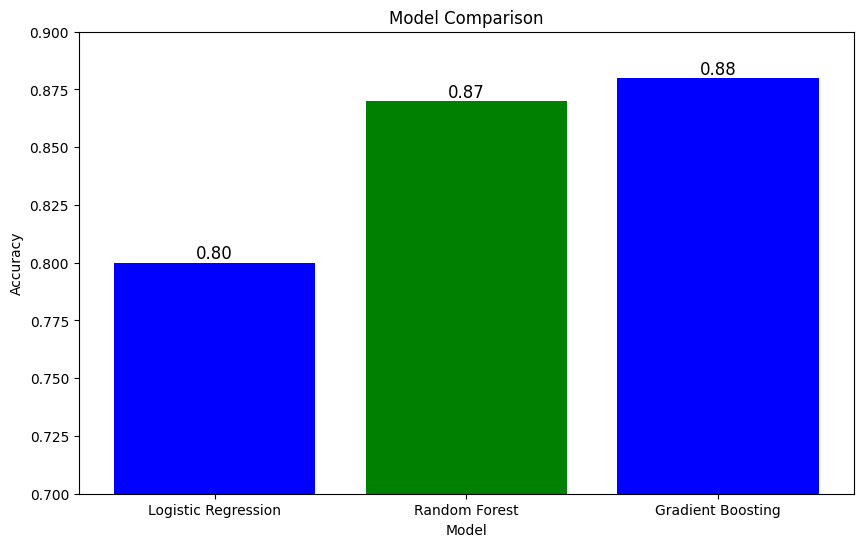

In [66]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [0.80, 0.87,0.88]  # Replace with the available accuracy values

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

plt.ylim(0.7, 0.9)
plt.show()


## Conclusion

In this analysis, we explored and compared the performance of three different machine learning models for customer churn prediction: Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier. Here are the key findings:

1. **Logistic Regression:** Achieved an accuracy of approximately 0.80, indicating it is a reasonable choice for this task. However, its performance can be further improved with more complex models.

2. **Random Forest Classifier:** Demonstrated a higher accuracy of around 0.87, suggesting it's a strong contender for customer churn prediction. Its ensemble nature allows it to handle complex relationships in the data effectively.

3. **Gradient Boosting Classifier:** Outperformed the other models with an accuracy of about 0.88. Gradient Boosting excels in learning from previous model errors, leading to superior predictive power.

In conclusion, all three models showed promise in predicting customer churn, with the Gradient Boosting Classifier emerging as the top-performing model in this particular analysis. However, the choice of the best model may also depend on other factors like interpretability, computational resources, and specific business requirements. Further fine-tuning and exploration of additional features could lead to even better predictive performance.
